In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sea
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


In [76]:
df = pd.read_csv('SOLUSTDAtas_tratado.csv')
df.head()

,date,open,high,low,close
0,2020-08-12 03:00:00,3.10,3.35,3.10,3.25
1,2020-08-12 04:00:00,3.25,3.25,3.15,3.15
2,2020-08-12 05:00:00,3.15,3.30,3.15,3.30
3,2020-08-12 06:00:00,3.30,3.30,3.15,3.30
4,2020-08-12 07:00:00,3.25,3.25,3.20,3.25


In [77]:
df.tail()

,date,open,high,low,close
36395,2024-10-08 20:00:00,143.35,143.9,142.35,142.95
36396,2024-10-08 21:00:00,142.95,144.1,142.25,143.75
36397,2024-10-08 22:00:00,143.75,144.5,143.35,144.50
36398,2024-10-08 23:00:00,144.50,144.7,144.05,144.25
36399,2024-10-09 00:00:00,144.25,144.3,143.55,143.80


In [78]:
df_mc = pd.read_csv('Indice_miedo_codicia.csv')
df_mc.head()

,date,value
0,22-10-2024,70
1,21-10-2024,72
2,20-10-2024,73
3,19-10-2024,72
4,18-10-2024,73


In [79]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36400 entries, 0 to 36399
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    36400 non-null  object 
 1   open    36400 non-null  float64
 2   high    36400 non-null  float64
 3   low     36400 non-null  float64
 4   close   36400 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.4+ MB
None


In [80]:
df_mc['date'] = pd.to_datetime(df_mc['date'], format='%d-%m-%Y')

expanded_rows = []

for index, row in df_mc.iterrows():
    date = row['date']
    value = row['value']
    for hour in range(24):
        new_date = date.replace(hour=hour)
        expanded_rows.append({'date': new_date, 'value': value})

expanded_df = pd.DataFrame(expanded_rows)


In [81]:
start_date = '	2020-08-12 03:00:00'
end_date = '2024-10-09 00:00:00'
filtered_df = expanded_df[(expanded_df['date'] >= start_date) & (expanded_df['date'] <= end_date)]
df_fil_sort = filtered_df.sort_values('date').copy()
df_fil_sort

,date,value
36771,2020-08-12 03:00:00,75
36772,2020-08-12 04:00:00,75
36773,2020-08-12 05:00:00,75
36774,2020-08-12 06:00:00,75
36775,2020-08-12 07:00:00,75
...,...,...
356,2024-10-08 20:00:00,49
357,2024-10-08 21:00:00,49
358,2024-10-08 22:00:00,49
359,2024-10-08 23:00:00,49


In [82]:
di = pd.read_csv('SOLUSTDAtas_tratado.csv')

In [83]:
df['date'] = pd.to_datetime(df['date']) 
df_fil_sort['date'] = pd.to_datetime(df_fil_sort['date']) 
df = pd.merge(df, df_fil_sort, on='date', how='left')
df

,date,open,high,low,close,value
0,2020-08-12 03:00:00,3.10,3.35,3.10,3.25,75
1,2020-08-12 04:00:00,3.25,3.25,3.15,3.15,75
2,2020-08-12 05:00:00,3.15,3.30,3.15,3.30,75
3,2020-08-12 06:00:00,3.30,3.30,3.15,3.30,75
4,2020-08-12 07:00:00,3.25,3.25,3.20,3.25,75
...,...,...,...,...,...,...
36395,2024-10-08 20:00:00,143.35,143.90,142.35,142.95,49
36396,2024-10-08 21:00:00,142.95,144.10,142.25,143.75,49
36397,2024-10-08 22:00:00,143.75,144.50,143.35,144.50,49
36398,2024-10-08 23:00:00,144.50,144.70,144.05,144.25,49


In [84]:
tamanio = df.shape[0]

In [85]:
df_train = df.copy().loc[0:int(tamanio*0.7)]
df_train

,date,open,high,low,close,value
0,2020-08-12 03:00:00,3.10,3.35,3.10,3.25,75
1,2020-08-12 04:00:00,3.25,3.25,3.15,3.15,75
2,2020-08-12 05:00:00,3.15,3.30,3.15,3.30,75
3,2020-08-12 06:00:00,3.30,3.30,3.15,3.30,75
4,2020-08-12 07:00:00,3.25,3.25,3.20,3.25,75
...,...,...,...,...,...,...
25476,2023-07-11 21:00:00,22.00,22.05,21.90,22.00,57
25477,2023-07-11 22:00:00,22.00,22.10,21.90,22.00,57
25478,2023-07-11 23:00:00,22.00,22.05,21.75,21.95,57
25479,2023-07-12 00:00:00,21.95,22.10,21.90,22.05,64


In [86]:
df_vali = df.copy().loc[int(tamanio*0.7 + 1):int(tamanio*0.9)]
df_vali

,date,open,high,low,close,value
25481,2023-07-12 02:00:00,22.10,22.30,22.05,22.15,64
25482,2023-07-12 03:00:00,22.15,22.25,22.10,22.10,64
25483,2023-07-12 04:00:00,22.10,22.10,22.00,22.00,64
25484,2023-07-12 05:00:00,22.00,22.00,21.90,21.95,64
25485,2023-07-12 06:00:00,21.95,22.05,21.90,22.00,64
...,...,...,...,...,...,...
32756,2024-05-10 05:00:00,153.65,154.35,152.85,153.95,66
32757,2024-05-10 06:00:00,153.95,154.70,153.45,153.75,66
32758,2024-05-10 07:00:00,153.75,154.10,152.30,153.30,66
32759,2024-05-10 08:00:00,153.30,155.10,153.15,154.95,66


In [87]:
df_test = df.copy().loc[int(tamanio*0.9 + 1):tamanio]
df_test

,date,open,high,low,close,value
32761,2024-05-10 10:00:00,154.35,154.5,153.45,154.10,66
32762,2024-05-10 11:00:00,154.10,154.8,153.25,154.15,66
32763,2024-05-10 12:00:00,154.15,154.3,153.25,154.15,66
32764,2024-05-10 13:00:00,154.15,155.2,153.00,155.05,66
32765,2024-05-10 14:00:00,155.05,155.4,153.10,153.30,66
...,...,...,...,...,...,...
36395,2024-10-08 20:00:00,143.35,143.9,142.35,142.95,49
36396,2024-10-08 21:00:00,142.95,144.1,142.25,143.75,49
36397,2024-10-08 22:00:00,143.75,144.5,143.35,144.50,49
36398,2024-10-08 23:00:00,144.50,144.7,144.05,144.25,49


In [88]:
regr1 = RandomForestRegressor(max_depth=100, random_state=0)

In [89]:
X1 = []
y1= []
for i in range(0, df_train.shape[0] - 1):
    auxy = df_train.iloc[i + 1]
    y1.append(auxy.close)
    aux = df_train.iloc[i]
    aux1 = []
    for r in range(1, aux.size):
        aux1.append(aux[r])
    X1.append(aux1)

C:\Users\raulg\AppData\Local\Temp\ipykernel_16780\2244255699.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aux1.append(aux[r])


In [90]:
regr1.fit(X1, y1)

RandomForestRegressor(max_depth=100, random_state=0)

In [91]:
Vali1 = []
aux = df_vali.iloc[0]
for r in range (0,100):
    aux = df_vali.iloc[r]
    Vali1aux = []
    for i in range(1, aux.size):
        Vali1aux.append(aux[i])
    Vali1.append(Vali1aux)
    print(Vali1)
predict = regr1.predict(Vali1)
print(predict)

[[22.1, 22.3, 22.05, 22.15, 64]]
[[22.1, 22.3, 22.05, 22.15, 64], [22.15, 22.25, 22.1, 22.1, 64]]
[[22.1, 22.3, 22.05, 22.15, 64], [22.15, 22.25, 22.1, 22.1, 64], [22.1, 22.1, 22.0, 22.0, 64]]
[[22.1, 22.3, 22.05, 22.15, 64], [22.15, 22.25, 22.1, 22.1, 64], [22.1, 22.1, 22.0, 22.0, 64], [22.0, 22.0, 21.9, 21.95, 64]]
[[22.1, 22.3, 22.05, 22.15, 64], [22.15, 22.25, 22.1, 22.1, 64], [22.1, 22.1, 22.0, 22.0, 64], [22.0, 22.0, 21.9, 21.95, 64], [21.95, 22.05, 21.9, 22.0, 64]]
[[22.1, 22.3, 22.05, 22.15, 64], [22.15, 22.25, 22.1, 22.1, 64], [22.1, 22.1, 22.0, 22.0, 64], [22.0, 22.0, 21.9, 21.95, 64], [21.95, 22.05, 21.9, 22.0, 64], [22.0, 22.1, 22.0, 22.05, 64]]
[[22.1, 22.3, 22.05, 22.15, 64], [22.15, 22.25, 22.1, 22.1, 64], [22.1, 22.1, 22.0, 22.0, 64], [22.0, 22.0, 21.9, 21.95, 64], [21.95, 22.05, 21.9, 22.0, 64], [22.0, 22.1, 22.0, 22.05, 64], [22.0, 22.2, 22.0, 22.05, 64]]
[[22.1, 22.3, 22.05, 22.15, 64], [22.15, 22.25, 22.1, 22.1, 64], [22.1, 22.1, 22.0, 22.0, 64], [22.0, 22.0, 21.9, 

C:\Users\raulg\AppData\Local\Temp\ipykernel_16780\3783098748.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Vali1aux.append(aux[i])


In [92]:
Valirpr = []
for i in range(0,100):
    Valirpr.append(df_vali.iloc[i].close)

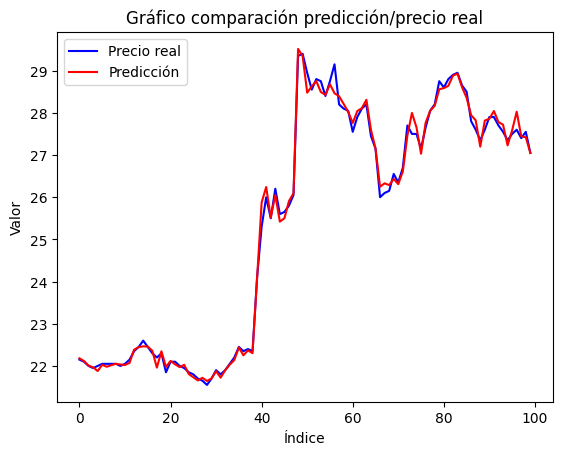

In [93]:
plt.plot(Valirpr, color='blue', label='Precio real')  # Línea azul
plt.plot(predict, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()